In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020__20231121.csv',
              low_memory=False)
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009970029,1022631,1155 Avenue of the Americas,Manhattan,10036,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.982826,40.756631
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013150001,1037545,200 East 42nd St.,Manhattan,10017,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,106.0,4.0,88.0,Turtle Bay-East Midtown,-73.974306,40.750698
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009990019,1022667,114 West 47th st,Manhattan,10036,...,0,5/21/2021 16:10,5/21/2021 16:13,MANHATTAN,105.0,4.0,125.0,Midtown-Midtown South,-73.982504,40.758310
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013190047,1037596,733 Third Avenue,Manhattan,10017,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,106.0,4.0,90.0,Turtle Bay-East Midtown,-73.972753,40.753074
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009950005,1085682,4 Times Square,Manhattan,10036,...,0,5/10/2021 18:30,5/10/2021 18:34,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.986244,40.756181


In [3]:
df.isna().sum()

Property Id               0
Property Name             0
Parent Property Id        0
Parent Property Name      0
Year Ending               0
                       ... 
Council District        989
Census Tract            989
NTA                     989
Longitude               989
Latitude                989
Length: 250, dtype: int64

In [4]:
def findNa(data):
    cols_with_na=data.eq("Not Available").any()
    na_list=cols_with_na[cols_with_na].index.to_list()
    na_list_count=df[na_list].eq('Not Available').sum()
    return na_list_count

In [5]:
findNa(df)

NYC Borough, Block and Lot (BBL)                              76
NYC Building Identification Number (BIN)                     112
Address 1                                                      4
Primary Property Type - Portfolio Manager-Calculated          10
National Median Reference Property Type                       10
                                                           ...  
Last Modified Date - Electric Meters                        1052
Last Modified Date - Gas Meters                             2450
Last Modified Date - Non-Electric Non-Gas Energy Meters    17768
Last Modified Date - Water Meters                           5777
Last Modified Date - Property Use                             16
Length: 210, dtype: int64

In [6]:
df.shape

(28067, 250)

### Removing irrelevant features

In [7]:
irrelevant_features=[
    'City', 'Parent Property Id','Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 
    'Primary Property Type - Self Selected', 'National Median Reference Property Type', 'List of All Property Use Types at Property', 
    '2nd Largest Property Use Type', '3rd Largest Property Use Type', 'Number of Buildings', 'National Median ENERGY STAR Score', 
    'Target ENERGY STAR Score', 'Reason(s) for No Score', 'ENERGY STAR Certification - Year(s) Certified (Score)', 'ENERGY STAR Certification - Eligibility',
    'ENERGY STAR Certification - Last Approval Date', 'LEED US Project ID', 'Estimated Data Flag - Electricity (Grid Purchase)',
    'Estimated Data Flag - Natural Gas', 'Estimated Data Flag - Fuel Oil (No. 1)', 'Estimated Data Flag - Fuel Oil (No. 2)', 
    'Estimated Data Flag - Fuel Oil (No. 4)', 'Estimated Data Flag - Fuel Oil (No. 5 and No. 6)', 'Estimated Data Flag - District Steam',
    'Estimated Data Flag - Municipally Supplied Potable Water: Mixed Indoor/Outdoor Use', 'Estimated Values - Energy',
    'Estimated Values - Water', 'Alert - Data Center Issue (with Estimates, IT Configuration, or IT Meter)', 
    'Alert - Energy Meter has less than 12 full calendar months of data', 'Alert - Energy Meter has gaps', 'Alert - Energy Meter has overlaps',
    'Alert - Energy - No meters selected for metrics', 'Alert - Energy Meter has single entry more than 65 days', 
    'Alert - Water Meter has less than 12 full calendar months of data', 'Alert - Property has no uses', 'Default Values', 
    'Temporary Values', 'Third Party Certification', 'Third Party Certification Date Anticipated', 'Third Party Certification Date Achieved',
    'Last Modified Date - Property', 'Last Modified Date - Electric Meters', 'Last Modified Date - Gas Meters', 'Last Modified Date - Non-Electric Non-Gas Energy Meters',
    'Last Modified Date - Water Meters', 'Last Modified Date - Property Use', 'Number of Active Energy Meters - Used to Compute Metrics', 
    'Number of Active Energy Meters - Not Used to Compute Metrics', 'Generation Date', 'Release Date','Multifamily Housing - Government Subsidized Housing',
    'Multifamily Housing - Gross Floor Area (ft²)', 'Multifamily Housing - Number of Bedrooms', 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Laundry Hookups in All Units', 'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
    'Multifamily Housing - Total Number of Residential Living Units', 'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Percent That Can Be Cooled', 'Multifamily Housing - Percent That Can Be Heated',
    'Multifamily Housing - Resident Population Type', 'Number of Active Energy Meters - Total', 'Number of Active IT Meters', 
    'Community Board', 'Council District', 'Census Tract'
]
df.drop(columns=irrelevant_features, inplace=True)

In [8]:
df.shape

(28067, 178)

### Removing Redundant Features 

In [9]:
red_features=['Direct GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions Intensity (kgCO2e/ft²)',
              'Indirect GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions Intensity (kgCO2e/ft²)',
              'Largest Property Use Type', 'Green Power - Offsite (kWh)',
              'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)', 'Property GFA - Calculated (Buildings and Parking) (ft²)', 'Property GFA - Calculated (Buildings) (ft²)',
              'Indoor Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Indoor Use (kgal)'
             ]
df.drop(columns=red_features, inplace=True)

In [10]:
df.shape

(28067, 167)

### Converting "Not Available" values to null values

In [11]:
df.replace("Not Available", np.nan, inplace=True)

In [12]:
df.isna().sum().nlargest(20)

Barracks- Gross Floor Area (ft²)                               28067
Convention Center - Gross Floor Area (ft²)                     28065
Propane Use (kBtu)                                             28064
District Hot Water Use (kBtu)                                  28064
Data Center - PUE                                              28064
Data Center - National Median PUE                              28064
Municipally Supplied Potable Water - Outdoor Use (kgal)        28059
Outdoor Water Use (All Water Sources) (kgal)                   28058
Ambulatory Surgical Center - Gross Floor Area (ft²)            28056
Wastewater Treatment Plant - Gross Floor Area (ft²)            28053
Energy/Power Station - Gross Floor Area (ft²)                  28052
Wholesale Club/Supercenter- Gross Floor Area (ft²)             28052
Wholesale Club/Supercenter- Exterior Entrance to the Public    28052
Fuel Oil #1 Use (kBtu)                                         28051
Courthouse - Gross Floor Area (ft²

In [13]:
missing_pct=(df.isnull().sum())/len(df)
missing_pct

Property Id                                                0.000000
Property Name                                              0.000000
Address 1                                                  0.000143
Postcode                                                   0.000000
Primary Property Type - Portfolio Manager-Calculated       0.000356
                                                             ...   
Municipally Supplied Potable Water - Outdoor Use (kgal)    0.999715
Borough                                                    0.034952
NTA                                                        0.035237
Longitude                                                  0.035237
Latitude                                                   0.035237
Length: 167, dtype: float64

### Finding features with greater than 80% values as null

In [14]:
threshold=0.8
def find_pct_na(df):
    missing_pct=(df.isnull().sum())/len(df)
    cols_with_high_na=missing_pct[missing_pct>threshold].index.tolist()
    return cols_with_high_na

In [15]:
features_high_na=find_pct_na(df)
features_high_na

['3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 'Annual Maximum Demand (Meter Name (Meter ID))',
 'Green Power - Onsite (kWh)',
 'Avoided Emissions - Onsite Green Power (Metric Tons CO2e)',
 'Percent of RECs Retained',
 'Percent of Total Electricity Generated from Onsite Renewable Systems',
 'Adult Education - Gross Floor Area (ft²)',
 'Am

In [16]:
features_high_na.remove('3rd Largest Property Use Type - Gross Floor Area (ft²)')

### Removing high null columns

In [17]:
def create_null_df(df):
    null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
    null_df=null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
    return null_df

In [18]:
df.drop(columns=features_high_na, inplace=True)

In [19]:
df.shape

(28067, 49)

In [20]:
df.isna().sum()

Property Id                                                                               0
Property Name                                                                             0
Address 1                                                                                 4
Postcode                                                                                  0
Primary Property Type - Portfolio Manager-Calculated                                     10
Largest Property Use Type - Gross Floor Area (ft²)                                       10
2nd Largest Property Use - Gross Floor Area (ft²)                                     21201
3rd Largest Property Use Type - Gross Floor Area (ft²)                                25586
Year Built                                                                                0
Construction Status                                                                       0
Occupancy                                                                       

### Removing missing values in those records which are very low as compared to our dataset size and dropping them won't create any issues in our analysis

In [21]:
df.shape

(28067, 49)

In [22]:
number_threshold=500
low_na_count=df.isna().sum()<500
features_with_low_na=low_na_count[low_na_count].index.tolist()

In [23]:
df.dropna(subset=features_with_low_na, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(27811, 49)

In [25]:
df.isna().sum()

Property Id                                                                               0
Property Name                                                                             0
Address 1                                                                                 0
Postcode                                                                                  0
Primary Property Type - Portfolio Manager-Calculated                                      0
Largest Property Use Type - Gross Floor Area (ft²)                                        0
2nd Largest Property Use - Gross Floor Area (ft²)                                     20985
3rd Largest Property Use Type - Gross Floor Area (ft²)                                25342
Year Built                                                                                0
Construction Status                                                                       0
Occupancy                                                                       

### Inspecting 'Metered Areas (Energy)' and 'Metered Areas (Water)' to handle its missing values

In [26]:
print('Column: Metered Areas (Energy)\n')
print(df['Metered Areas (Energy)'].value_counts())
print('------------'*10)
print('Column: Metered Areas (Water)\n')
print(df['Metered Areas (Water)'].value_counts())

Column: Metered Areas (Energy)

Whole Property                                                                                                                          26863
Another configuration                                                                                                                      42
Common areas (all energy loads)                                                                                                             3
Common Area Plug Load/Electricity, Tenant Hot Water                                                                                         1
Common Area Hot Water, Common Area Cooling, Common Area Plug Load/Electricity, Tenant Hot Water, Common Area Heating, Tenant Heating        1
Common Area Cooling, Common Area Heating, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Heating, Tenant Hot Water        1
Tenant Heating, Common Area Heating, Common Area Cooling, Common Area Hot Water, Common Area Plug Load/Electricity, 

### As we can see 'Whole Property' dominates overwhelmingly in both features. Hence it is safe to impute missing values in those features with its mode

In [27]:
categorical_col=['Metered Areas (Energy)', 'Metered Areas (Water)']
for col in categorical_col:
    df[col]=df[col].fillna(df[col].mode().iloc[0])

In [28]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),25342
2nd Largest Property Use - Gross Floor Area (ft²),20985
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),8593
Water Use (All Water Sources) (kgal),8575
ENERGY STAR Score,5121
Weather Normalized Site Natural Gas Use (therms),2837
Weather Normalized Site Natural Gas Intensity (therms/ft²),2837
Weather Normalized Source Energy Use (kBtu),2379
Weather Normalized Site EUI (kBtu/ft²),2379
Weather Normalized Site Energy Use (kBtu),2379


### For our further analysis, we need to make use of correct datatypes

In [29]:
obj_features=df.select_dtypes('object').columns
int_features=df.select_dtypes('int64').columns
float_features=df.select_dtypes('float64').columns

In [30]:
obj_features

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)',
       'Construction Status', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therm

In [31]:
feature_dtypes_to_change=['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)',
                          '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 
                          'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)',
                          'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
                          'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)', 
                          'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)', 'Natural Gas Use (therms)', 
                          'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)',
                          'Electricity Use - Grid Purchase (kBtu)', 'Electricity Use - Grid Purchase (kWh)', 'Weather Normalized Site Electricity (kWh)',
                          'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
                          'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
                          'Green Power - Onsite and Offsite (kWh)', 'Total GHG Emissions Intensity (kgCO2e/ft²)',
                          'Net Emissions (Metric Tons CO2e)', 'National Median Total GHG Emissions (Metric Tons CO2e)',
                          'eGRID Output Emissions Rate (kgCO2e/MBtu)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
                          'Percent of Electricity that is Green Power', 'Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)'    
]


In [32]:
df[feature_dtypes_to_change]=df[feature_dtypes_to_change].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [33]:
df.dtypes.value_counts()

float64    37
object      9
int64       3
dtype: int64

In [34]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Construction Status', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'Borough', 'NTA'],
      dtype='object')

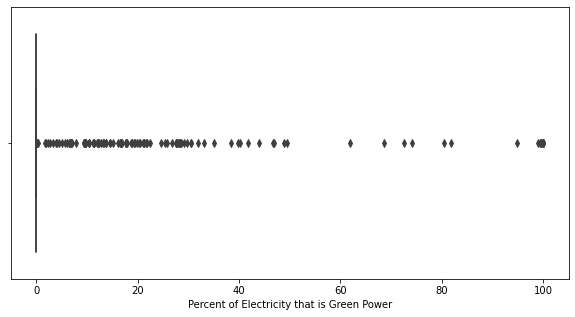

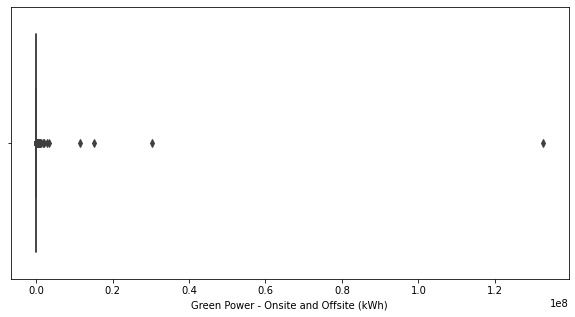

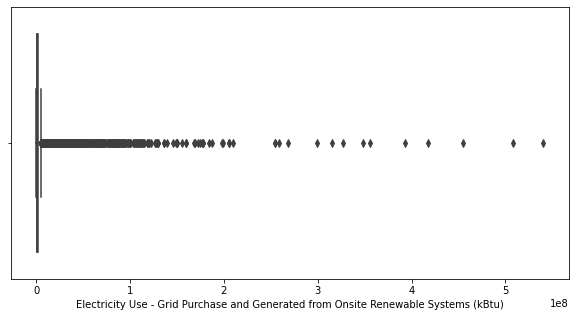

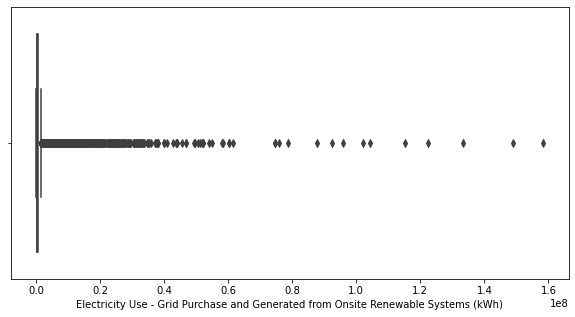

In [35]:
green_energy_features=['Percent of Electricity that is Green Power', 'Green Power - Onsite and Offsite (kWh)', 
                       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)', 
                       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)']

for col in green_energy_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col].dropna(),data=df)

### Visualizing numerical features using box plots

In [36]:
df.select_dtypes(include='number').columns

Index(['Property Id', 'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchas

In [37]:
cols_to_viz=df.select_dtypes(include='number').drop(columns=['Property Id', 'Year Built', 'Longitude', 'Latitude']).columns
cols_to_viz

Index(['Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Occupancy',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Nor

In [38]:
len(cols_to_viz)

36

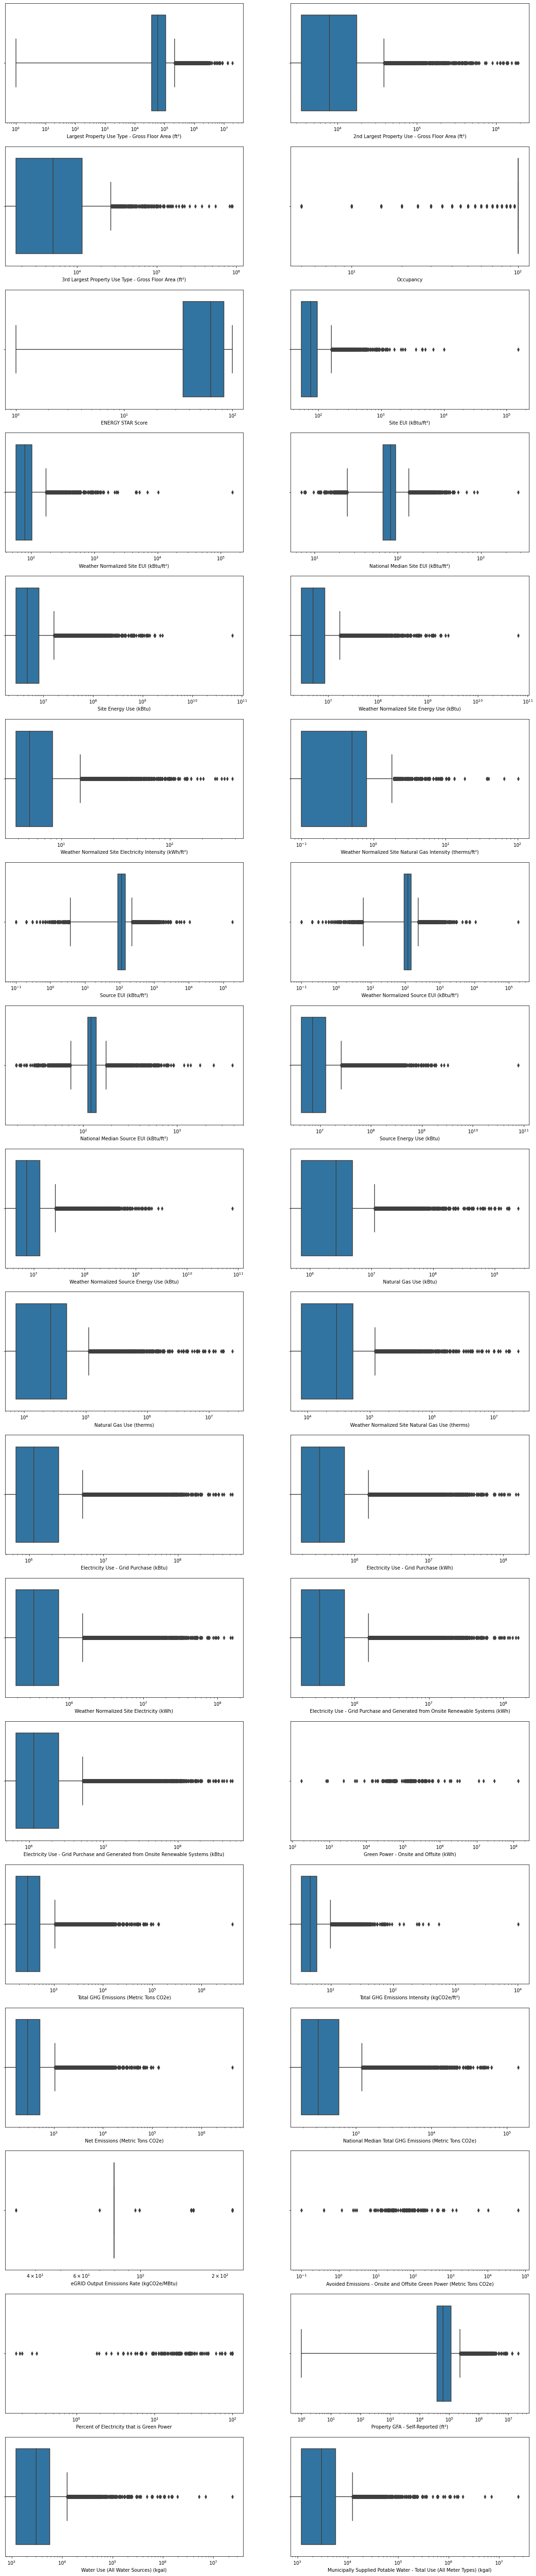

In [39]:
plt.figure(figsize=(20, 100))
for index, column in enumerate(cols_to_viz, 1):
    plt.subplot(18, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()



### As we can see all numeric columns have outliers. Hence the most useful strategy is fill their missing values with median

In [40]:
cols_to_fill_na=df.select_dtypes(include='number').drop(columns=['Property Id', 'Largest Property Use Type - Gross Floor Area (ft²)',
                                                                 '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Longitude', 'Latitude',
                                                                'Year Built']).columns
cols_to_fill_na

Index(['Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
       'Electricity Use - Grid Purchase and Generated from On

In [41]:
for column in cols_to_fill_na:
    median_values = df.groupby('Primary Property Type - Portfolio Manager-Calculated')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Primary Property Type - Portfolio Manager-Calculated']] if pd.isna(row[column]) else row[column], axis=1)

In [42]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),25342
2nd Largest Property Use - Gross Floor Area (ft²),20985
ENERGY STAR Score,2641
Longitude,936
NTA,936
Latitude,936
Borough,928
National Median Source EUI (kBtu/ft²),531
National Median Total GHG Emissions (Metric Tons CO2e),531
National Median Site EUI (kBtu/ft²),531


### Creating a new column named 'Area Under Usage' by summing the values of 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)' columns

In [43]:
df['Area Under Usage (ft^2)']=df[['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
                           '3rd Largest Property Use Type - Gross Floor Area (ft²)']].sum(axis=1, skipna=True)

In [44]:
df.drop(columns=['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
                 '3rd Largest Property Use Type - Gross Floor Area (ft²)'], inplace=True)

In [45]:
create_null_df(df)

,Null Count
ENERGY STAR Score,2641
NTA,936
Longitude,936
Latitude,936
Borough,928
National Median Site EUI (kBtu/ft²),531
National Median Total GHG Emissions (Metric Tons CO2e),531
National Median Source EUI (kBtu/ft²),531
Water Use (All Water Sources) (kgal),9
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),9


### We have some features without any location information. It would make our analysis useless if the records have no location information. Hence dropping records with no location information.

In [46]:
df.shape

(27811, 47)

In [47]:
loc_features_na=['NTA', 'Longitude', 'Latitude', 'Borough']
df.dropna(subset=loc_features_na, inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.shape

(26875, 47)

In [49]:
null_df=create_null_df(df)
null_df

,Null Count
ENERGY STAR Score,2470
National Median Site EUI (kBtu/ft²),504
National Median Source EUI (kBtu/ft²),504
National Median Total GHG Emissions (Metric Tons CO2e),504
Water Use (All Water Sources) (kgal),9
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),9
Weather Normalized Site Electricity Intensity (kWh/ft²),4
Electricity Use - Grid Purchase (kBtu),4
Electricity Use - Grid Purchase (kWh),4
Weather Normalized Site Electricity (kWh),4


### The rest of the null values are due to no corresponding median values available for that specific property type in the original dataset. Hence, the most appropriate way is to fill them is with the median for the specific borough

In [50]:
null_features=null_df.index.tolist()
null_features

['ENERGY STAR Score',
 'National Median Site EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 'National Median Total GHG Emissions (Metric Tons CO2e)',
 'Water Use (All Water Sources) (kgal)',
 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
 'Percent of Electricity that is Green Power']

In [51]:
df['Borough']

0        MANHATTAN
1        MANHATTAN
2        MANHATTAN
3        MANHATTAN
4        MANHATTAN
           ...    
26870    MANHATTAN
26871       QUEENS
26872       QUEENS
26873    MANHATTAN
26874       QUEENS
Name: Borough, Length: 26875, dtype: object

In [52]:
for column in null_features:
    median_values = df.groupby('Borough')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Borough']] if pd.isna(row[column]) else row[column], axis=1)

### Removing inconsistencies in Postcodes

In [53]:
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
1219,111011128,QUEENS
1364,100381836,MANHATTAN
1430,110401433,QUEENS
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
4408,100016905,MANHATTAN
4896,100750264,MANHATTAN
5026,113783050,QUEENS
5032,111015107,QUEENS


### As we can see, some postcodes are greater than length 5. Hence it is necessary to rectify it will be required for geographic visualization

In [54]:
#Correcting ZIP Codes for 'Manhattan' Borough

mask_manhattan=(df['Postcode'].str.len()>5) & (df['Borough']=='MANHATTAN')
mask_manhattan_df=df[mask_manhattan][['Postcode', 'Property Name','NTA', 'Borough']]
mask_manhattan_df['Postcode']=mask_manhattan_df['Postcode'].str[:5]
df.loc[mask_manhattan, 'Postcode']=mask_manhattan_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
1219,111011128,QUEENS
1430,110401433,QUEENS
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
5026,113783050,QUEENS
5032,111015107,QUEENS
5153,104693134,BRONX
6047,104573638,BRONX
6048,104575105,BRONX


In [55]:
#Correcting ZIP Codes for 'Queens' Borough

mask_queens=(df['Postcode'].str.len()>5) & (df['Borough']=='QUEENS')
mask_queens_df=df[mask_queens][['Postcode', 'Property Name','NTA', 'Borough']]
mask_queens_df['Postcode']=mask_queens_df['Postcode'].str[:5]
df.loc[mask_queens, 'Postcode']=mask_queens_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
5153,104693134,BRONX
6047,104573638,BRONX
6048,104575105,BRONX
6049,104575132,BRONX
6420,112063812,BROOKLYN
6453,112063812,BROOKLYN
10769,112074037,BROOKLYN


In [56]:
#Correcting ZIP Codes for 'Bronx' Borough

mask_bronx=(df['Postcode'].str.len()>5) & (df['Borough']=='BRONX')
mask_bronx_df=df[mask_bronx][['Postcode', 'Property Name','NTA', 'Borough']]
mask_bronx_df['Postcode']=mask_bronx_df['Postcode'].str[:5]
df.loc[mask_bronx, 'Postcode']=mask_bronx_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
6420,112063812,BROOKLYN
6453,112063812,BROOKLYN
10769,112074037,BROOKLYN
10770,112074037,BROOKLYN
23579,112094412,BROOKLYN


In [57]:
#Correcting ZIP Codes for 'Brooklyn' Borough

mask_brooklyn=(df['Postcode'].str.len()>5) & (df['Borough']=='BROOKLYN')
mask_brooklyn_df=df[mask_brooklyn][['Postcode', 'Property Name','NTA', 'Borough']]
mask_brooklyn_df['Postcode']=mask_brooklyn_df['Postcode'].str[:5]
df.loc[mask_brooklyn, 'Postcode']=mask_brooklyn_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough


In [58]:
df.isna().sum()

Property Id                                                                           0
Property Name                                                                         0
Address 1                                                                             0
Postcode                                                                              0
Primary Property Type - Portfolio Manager-Calculated                                  0
Year Built                                                                            0
Construction Status                                                                   0
Occupancy                                                                             0
Metered Areas (Energy)                                                                0
Metered Areas (Water)                                                                 0
ENERGY STAR Score                                                                     0
Site EUI (kBtu/ft²)             

In [59]:
df.shape

(26875, 47)

In [60]:
df.dtypes

Property Id                                                                             int64
Property Name                                                                          object
Address 1                                                                              object
Postcode                                                                               object
Primary Property Type - Portfolio Manager-Calculated                                   object
Year Built                                                                              int64
Construction Status                                                                    object
Occupancy                                                                               int64
Metered Areas (Energy)                                                                 object
Metered Areas (Water)                                                                  object
ENERGY STAR Score                                           

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
df.head()

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Construction Status,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Borough,NTA,Longitude,Latitude,Area Under Usage (ft^2)
0,7365,1155,1155 Avenue of the Americas,10036,Office,1982,Existing,55,Whole Property,Whole Property,...,0.0,0.0,686838.0,1131.8,1127.55,MANHATTAN,Midtown-Midtown South,-73.982826,40.756631,686838.0
1,8139,200,200 East 42nd St.,10017,Office,1956,Existing,100,Whole Property,Whole Property,...,0.0,0.0,384432.0,5025.7,5025.70,MANHATTAN,Turtle Bay-East Midtown,-73.974306,40.750698,384432.0
2,8604,114,114 West 47th st,10036,Financial Office,1989,Existing,95,Whole Property,Whole Property,...,0.0,0.0,577534.0,7994.8,7828.80,MANHATTAN,Midtown-Midtown South,-73.982504,40.758310,577534.0
3,8841,733,733 Third Avenue,10017,Office,1961,Existing,100,Whole Property,Whole Property,...,0.0,0.0,390878.0,1131.8,1127.55,MANHATTAN,Turtle Bay-East Midtown,-73.972753,40.753074,390878.0
4,11809,Conde Nast Building,4 Times Square,10036,Office,1999,Existing,100,Whole Property,Whole Property,...,0.0,0.0,1601977.0,1131.8,1127.55,MANHATTAN,Midtown-Midtown South,-73.986244,40.756181,1601977.0


### Inspecting duplicate values

In [63]:
df[df.duplicated(subset=['Property Id'])]

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Construction Status,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Borough,NTA,Longitude,Latitude,Area Under Usage (ft^2)
1340,2597673,CBS-530,530 W57th St,10019,Office,1937,Existing,100,Whole Property,Whole Property,...,0.0,0.0,466063.0,33566.8,33566.80,MANHATTAN,Clinton,-73.990852,40.770073,466063.0
1342,2597674,CBS-513,513 W56th St,10019,Office,1984,Existing,100,Whole Property,Whole Property,...,0.0,0.0,183710.0,1131.8,1127.55,MANHATTAN,Clinton,-73.989541,40.768656,183710.0
1344,2597675,CBS-518,518 W57th St,10019,Office,1912,Existing,100,Whole Property,Whole Property,...,0.0,0.0,69677.0,5267.9,5267.90,MANHATTAN,Clinton,-73.989881,40.769664,69677.0
1359,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.60,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0
1531,2637884,12 W 72 St.,12 W 72 Street,10023,Multifamily Housing,1950,Existing,100,Whole Property,Whole Property,...,0.0,0.0,178893.0,5539.3,5539.30,MANHATTAN,Lincoln Square,-73.976889,40.776600,178893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25887,15583886,Spellman Hall,300 Howard Avenue,10301,Office,1935,Existing,100,Whole Property,Whole Property,...,0.0,0.0,10029.0,1131.8,1127.55,STATEN IS,Grymes Hill-Clifton-Fox Hills,-74.088569,40.622406,10029.0
25897,15583895,Flynn Hall,300 Howard Avenue,10301,Office,1935,Existing,100,Whole Property,Whole Property,...,0.0,0.0,17736.0,1131.8,1127.55,STATEN IS,Grymes Hill-Clifton-Fox Hills,-74.088569,40.622406,17736.0
26325,16057131,231 West 74th Street Corp,231 West 74th Street,10023,Multifamily Housing,1920,Existing,100,Whole Property,Whole Property,...,0.0,0.0,4440.0,3837.0,3837.75,MANHATTAN,Upper West Side,-73.982267,40.780609,4440.0
26327,16057132,233 West 74th Street Corp,233 West 74th Street,10023,Multifamily Housing,1920,Existing,100,Whole Property,Whole Property,...,0.0,0.0,4314.0,3837.0,3837.75,MANHATTAN,Upper West Side,-73.982516,40.780713,4314.0


In [64]:
df[df['Property Id']==2605548]

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Construction Status,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Borough,NTA,Longitude,Latitude,Area Under Usage (ft^2)
1358,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.6,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0
1359,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.6,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0


### As we can see above, we have to remove duplicate records

In [65]:
df.shape

(26875, 47)

In [66]:
df['Property Id'].nunique()

26673

In [67]:
df.drop_duplicates(subset=['Property Id'], inplace=True)

In [68]:
df.shape

(26673, 47)

### Our dataset is completely cleaned now and we can move on our further analysis

## Exploratory Data Analysis

In [69]:
df.describe()

,Property Id,Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),...,National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Longitude,Latitude,Area Under Usage (ft^2)
count,2.667300e+04,26673.000000,26673.000000,26673.000000,26673.000000,26673.000000,26673.000000,2.667300e+04,2.667300e+04,26673.000000,...,26673.000000,26673.000000,26673.000000,26673.000000,2.667300e+04,2.667300e+04,2.667300e+04,26673.000000,26673.000000,2.667300e+04
mean,6.624665e+06,1948.973231,97.323323,59.017715,89.528366,93.331882,82.115926,1.254985e+07,1.250177e+07,7.339660,...,665.458578,79.634934,3.252682,0.125749,1.188280e+05,5.350549e+03,5.302520e+03,-73.937378,40.748185,1.201502e+05
std,3.731749e+06,34.499742,11.510268,26.914261,942.949918,942.711651,33.961354,3.940010e+08,3.938716e+08,9.046652,...,1761.959848,4.220233,398.849298,2.708258,2.677987e+05,6.090354e+04,6.064155e+04,0.062863,0.078437,2.708344e+05
min,7.365000e+03,1367.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,79.500000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,-74.244118,40.508319,1.000000e+00
25%,3.539025e+06,1925.000000,100.000000,42.000000,54.600000,59.200000,66.900000,2.813131e+06,3.069246e+06,3.800000,...,191.700000,79.500000,0.000000,0.000000,3.818900e+04,1.131800e+03,1.127550e+03,-73.979455,40.697961,3.828500e+04
50%,6.294018e+06,1937.000000,100.000000,61.000000,75.600000,81.600000,82.100000,4.807336e+06,5.110458e+06,5.100000,...,314.100000,79.500000,0.000000,0.000000,6.100000e+04,3.476100e+03,3.476100e+03,-73.948707,40.750113,6.126800e+04
75%,6.826014e+06,1971.000000,100.000000,80.000000,96.700000,100.300000,93.800000,8.062800e+06,8.079531e+06,8.300000,...,578.200000,79.500000,0.000000,0.000000,1.125590e+05,4.342500e+03,4.337200e+03,-73.903350,40.811367,1.132700e+05
max,1.733357e+07,2088.000000,100.000000,100.000000,152022.800000,152021.000000,2789.100000,6.403716e+10,6.403643e+10,378.300000,...,62832.200000,222.900000,64315.600000,100.000000,1.354011e+07,7.055232e+06,7.055232e+06,-73.700935,40.912869,1.354011e+07


In [70]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid 

In [71]:
df[['Electricity Use - Grid Purchase (kBtu)', 'Electricity Use - Grid Purchase (kWh)']]

,Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh)
0,22207475.2,6508637.9
1,14326365.4,4198817.0
2,20874608.4,6117997.0
3,14354838.4,4207162.0
4,81065267.9,23758868.1
...,...,...
26870,756224.0,221636.6
26871,501436.0,146962.5
26872,501436.0,146962.5
26873,614825.4,180195.0


In [72]:
df[[
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',]]

,Weather Normalized Source Energy Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms)
0,7.178237e+07,926910.45,9269.104412,9955.4
1,1.315357e+08,926910.45,9269.104412,9955.4
2,7.404262e+07,893036.70,8930.366754,8930.4
3,5.678245e+07,804271.70,8042.716940,8042.7
4,2.809075e+08,34039087.30,340390.872700,379902.4
...,...,...,...,...
26870,4.778168e+06,2332401.00,23324.009680,25340.4
26871,3.145767e+06,870966.70,8709.666560,10375.1
26872,3.145767e+06,870966.70,8709.666560,10375.1
26873,4.140329e+06,1703583.60,17035.835590,21066.4


### Some features are repeated in the dataset with different units. Hence, they are removed

In [73]:
red_features=[
    'Electricity Use - Grid Purchase (kBtu)', 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
    'Natural Gas Use (kBtu)'
]
df.drop(columns=red_features, inplace=True)

In [74]:
df.shape

(26673, 44)

#### Questions

Q-1) Which types of buildings have the highest net emissions?  
Q-2) Is there any correlation between the age of building and the emissions?  
Q-3) Is there any correlation between the occupancy and energy consumption?   
Q-4) What is the share of green energy consumption among the buildings of NYC?  
Q-5) Which borough/locality have the highest energy consumption?  
Q-6) Which type of buildings haave highest water usage?  
Q-7) Which type of buildings have very high energy intensity?

In [75]:
df['Net Emissions (Metric Tons CO2e)']

0        2190.6
1        6184.2
2        2407.5
3        2003.9
4        8976.8
          ...  
26870     184.0
26871       0.0
26872       0.0
26873     139.3
26874       0.0
Name: Net Emissions (Metric Tons CO2e), Length: 26673, dtype: float64

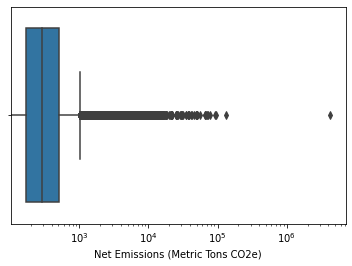

In [76]:
sns.boxplot(x=df['Net Emissions (Metric Tons CO2e)'])
plt.xscale('log')

### There is one very high value for 'Net Emissions' in one record

In [77]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

In [78]:
cols_to_viz=df.select_dtypes('float64').columns.tolist()
features_to_remove=['ENERGY STAR Score', 'Longitude','Latitude']
cols=[feature for feature in cols_to_viz if feature not in features_to_remove]

In [79]:
len(cols)

29

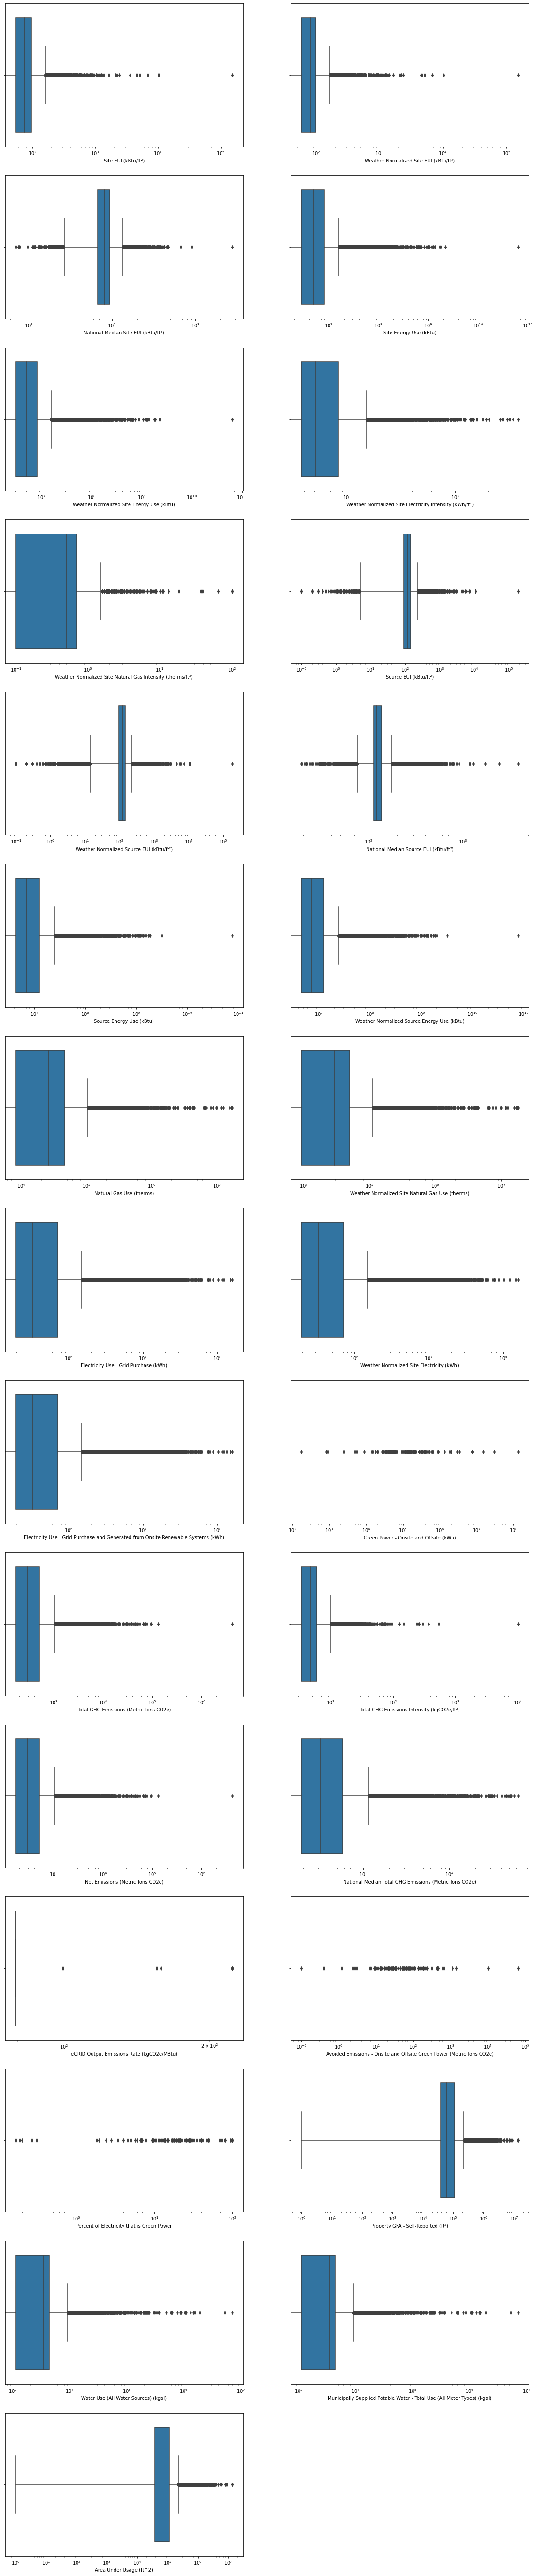

In [80]:
plt.figure(figsize=(20, 100))
for index, column in enumerate(cols, 1):
    plt.subplot(15, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()

In [81]:
print(df['Site EUI (kBtu/ft²)'].max())
print(df['Weather Normalized Site EUI (kBtu/ft²)'].max())
print(df['National Median Site EUI (kBtu/ft²)'].max())
print(df['Site Energy Use (kBtu)'].max())
print(df['Weather Normalized Site Energy Use (kBtu)'].max())
print(df['Source EUI (kBtu/ft²)'].max())
print(df['Weather Normalized Source EUI (kBtu/ft²)'].max())
print(df['Source Energy Use (kBtu)'].max())
print(df['Weather Normalized Source Energy Use (kBtu)'].max())
print(df['Total GHG Emissions Intensity (kgCO2e/ft²)'].max())
print(df['Net Emissions (Metric Tons CO2e)'].max())

152022.8
152021.0
2789.1
64037164970.0
64036433107.0
183038.4
183033.5
77101999339.0
77099950122.0
10090.6
4250523.3


In [82]:
df[df['Site EUI (kBtu/ft²)']==152022.8][['Weather Normalized Site EUI (kBtu/ft²)','National Median Site EUI (kBtu/ft²)',
                                        'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)',
                                        'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
                                        'Source Energy Use (kBtu)', 'Weather Normalized Source Energy Use (kBtu)',
                                        'Total GHG Emissions Intensity (kgCO2e/ft²)', 'Net Emissions (Metric Tons CO2e)']]

,Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e)
18300,152021.0,81.5,6.403716e+10,6.403643e+10,183038.4,183033.5,7.710200e+10,7.709995e+10,10090.6,4250523.3


### The above record has unusually very high value and is generally due to entry/human error. We risk skewing our analysis due to the presence of such high value. We will drop that record

In [83]:
df.drop(index=18300, inplace=True)
df.reset_index(drop=True, inplace=True)

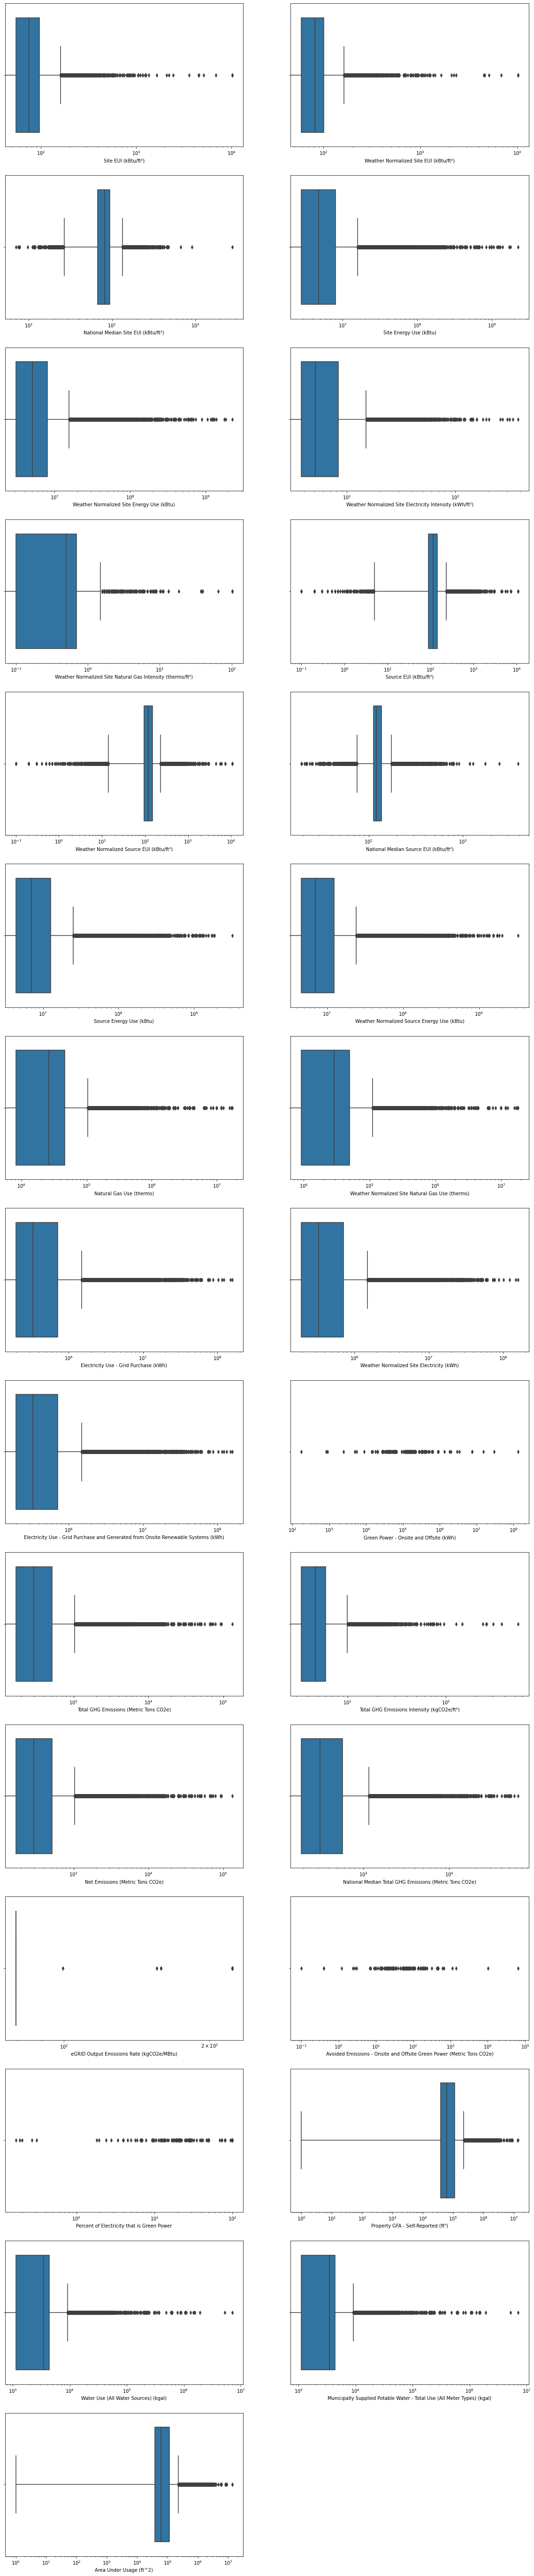

In [84]:
plt.figure(figsize=(20, 100))
for index, column in enumerate(cols, 1):
    plt.subplot(15, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()

In [85]:
df['Primary Property Type - Portfolio Manager-Calculated']
df['Net Emissions (Metric Tons CO2e)']

0        2190.6
1        6184.2
2        2407.5
3        2003.9
4        8976.8
          ...  
26667     184.0
26668       0.0
26669       0.0
26670     139.3
26671       0.0
Name: Net Emissions (Metric Tons CO2e), Length: 26672, dtype: float64

In [86]:
net_emissions_by_type=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Net Emissions (Metric Tons CO2e)'].median().nlargest(10))
net_emissions_by_type

,Net Emissions (Metric Tons CO2e)
Primary Property Type - Portfolio Manager-Calculated,
Wastewater Treatment Plant,12211.70
Zoo,10432.25
Data Center,4669.85
Hospital (General Medical & Surgical),4456.60
Financial Office,3069.70
Other - Specialty Hospital,3049.10
Ambulatory Surgical Center,2757.25
Enclosed Mall,2410.20
Prison/Incarceration,1939.40


In [87]:
net_emissions_by_type.values.reshape(-1, 1)

array([[12211.7 ],
       [10432.25],
       [ 4669.85],
       [ 4456.6 ],
       [ 3069.7 ],
       [ 3049.1 ],
       [ 2757.25],
       [ 2410.2 ],
       [ 1939.4 ],
       [ 1248.4 ]])

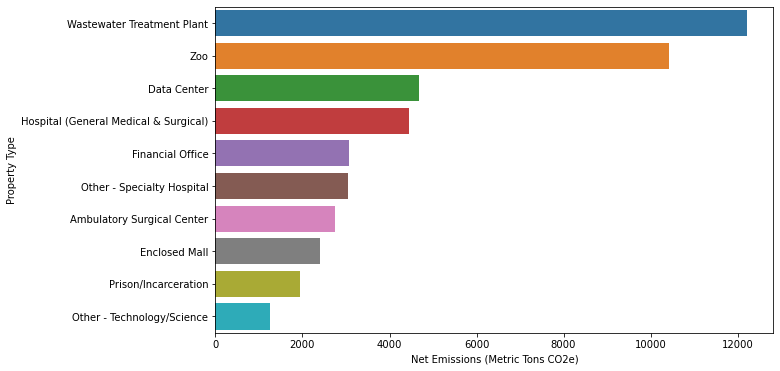

In [88]:
plt.rcParams['figure.figsize']=(10, 6)
sns.barplot(data=net_emissions_by_type, y=net_emissions_by_type.index, x=net_emissions_by_type.values.ravel())
plt.xlabel('Net Emissions (Metric Tons CO2e)')
plt.ylabel('Property Type')
plt.show()

#### Categories namely Wastewater Treatment Plant, Zoo, Data Center, Hospital (General Medical & Surgical) and Financial Office have the highest net emissions in NYC                     

### Let's find which Property Type has median higher emissions intensity i.e. emission per sq. feet

In [89]:
emission_intensity_by_type=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Total GHG Emissions Intensity (kgCO2e/ft²)'].median().nlargest(10))
emission_intensity_by_type

,Total GHG Emissions Intensity (kgCO2e/ft²)
Primary Property Type - Portfolio Manager-Calculated,
Zoo,21.8
Data Center,21.6
Ice/Curling Rink,18.9
Other - Technology/Science,17.9
Wastewater Treatment Plant,16.1
Veterinary Office,15.9
Supermarket/Grocery Store,14.9
Ambulatory Surgical Center,14.8
Other - Specialty Hospital,14.7


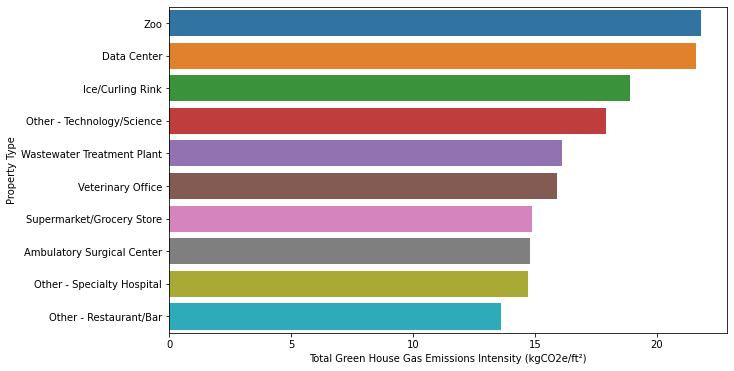

In [90]:
sns.barplot(data=emission_intensity_by_type, y=emission_intensity_by_type.index, x=emission_intensity_by_type.values.ravel())
plt.xlabel('Total Green House Gas Emissions Intensity (kgCO2e/ft²)')
plt.ylabel('Property Type')
plt.show()

### From the above two charts, apart from utility and recreational facilities, data centers is common in both chart. Many studies have shown that data centers have high energy usage and thereby high emissions. As the businesses become more data driven and the current dawn of generative AIs, governments and corporations will need to invest more to lessen its imapct on our environment.

In [91]:
df['Year Built'].describe()

count    26672.000000
mean      1948.973455
std         34.500369
min       1367.000000
25%       1925.000000
50%       1937.000000
75%       1971.000000
max       2088.000000
Name: Year Built, dtype: float64

### Some values in 'Year Built' is incorrect. We should correct them and remove those whose information is not found

In [92]:
df[(df['Year Built']<1800) | (df['Year Built']>2020)][['Property Id', 'Property Name','Address 1', 'Year Built', 'Borough']]

,Property Id,Property Name,Address 1,Year Built,Borough
9965,5214338,East Island Mgmt,10236 64th Ave,1649,QUEENS
17362,6690462,HPHW Realty Corp,604 Pacific Street,2021,BROOKLYN
18462,6772436,Queens Quality Management - 6541 Booth st,6541 Booth st,1393,QUEENS
20476,7126159,95 Rockwell Place,95 Rockwell Place,2022,BROOKLYN
21287,8705078,2077 5th Avenue St. Claire on Fifth Condominium,2077 5th Avenue,2088,MANHATTAN
23748,12344301,"BBL 2-05900-0150: Van Cortlandt Park, DPR (LL84)",6200 Broadway,1749,BRONX
26375,16734560,JLL - 154 Morgan ave,154 Morgan ave,1367,BROOKLYN


In [93]:
df.loc[df.index==9965, 'Year Built']=1949
df.loc[df.index==18462, 'Year Built']=1939
df.loc[df.index==21287, 'Year Built']=2007
df.loc[df.index==26375, 'Year Built']=1967

In [94]:
df[(df['Year Built']<1800) | (df['Year Built']>2022)][['Property Id', 'Property Name','Address 1', 'Year Built', 'Borough']]

,Property Id,Property Name,Address 1,Year Built,Borough
23748,12344301,"BBL 2-05900-0150: Van Cortlandt Park, DPR (LL84)",6200 Broadway,1749,BRONX


### Removing the above record as no information regarding its built year was found

In [95]:
df.drop(index=23748, inplace=True)

In [96]:
df.reset_index(drop=True, inplace=True)

In [97]:
df['Year Built'].describe()

count    26671.000000
mean      1949.032132
std         34.067158
min       1800.000000
25%       1925.000000
50%       1937.000000
75%       1971.000000
max       2022.000000
Name: Year Built, dtype: float64

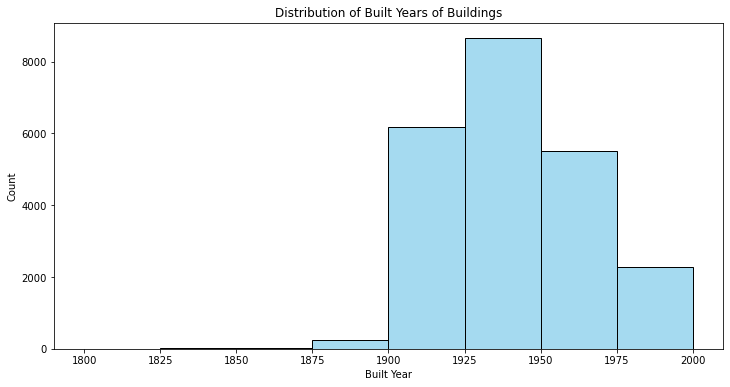

In [98]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['Year Built'], bins=range(1800, 2023, 25), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Built Years of Buildings')
plt.xlabel('Built Year')
plt.ylabel('Count')
plt.show()

### Finding the emissions intensity as per different property use type

In [99]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

### The ENERGY STAR Score is a measure of how well your property is performing relative to similar properties, when normalized for climate and operational characteristics. The 1-100 scale is set so that 1 represents the worst performing buildings and 100 represents the best performing buildings. A score of 50 indicates that a building is performing at the national median, taking into account its size, location, and operating parameters. A score of 75 indicates that a property is performing in the 75th percentile.


Text(50, 2000, 'National Median')

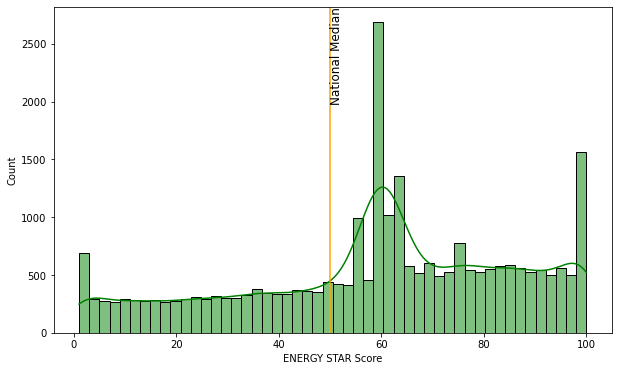

In [100]:
sns.histplot(df['ENERGY STAR Score'], bins=50, kde=True, color='green')
plt.axvline(x=50, color='orange')
plt.text(50, 2000, 'National Median', rotation=90, fontsize=12, )

### As we can see that higher proportion of NYC buildings are having scores greater than 50 i.e. higher than the national median

In [101]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

### Let's analyze water usage

In [102]:
df['Primary Property Type - Portfolio Manager-Calculated']

0                         Office
1                         Office
2               Financial Office
3                         Office
4                         Office
                  ...           
26666    Senior Living Community
26667           Worship Facility
26668           Worship Facility
26669        Multifamily Housing
26670           Worship Facility
Name: Primary Property Type - Portfolio Manager-Calculated, Length: 26671, dtype: object

In [103]:
water_usage_df=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Water Use (All Water Sources) (kgal)'].median().nlargest(10))
water_usage_df

,Water Use (All Water Sources) (kgal)
Primary Property Type - Portfolio Manager-Calculated,
Data Center,25317.50
Stadium (Open),9154.30
Senior Care Community,8851.70
Other - Specialty Hospital,8585.40
Financial Office,7994.80
Other - Technology/Science,7582.00
Senior Living Community,7125.90
Other - Restaurant/Bar,6629.85
Residential Care Facility,5478.10


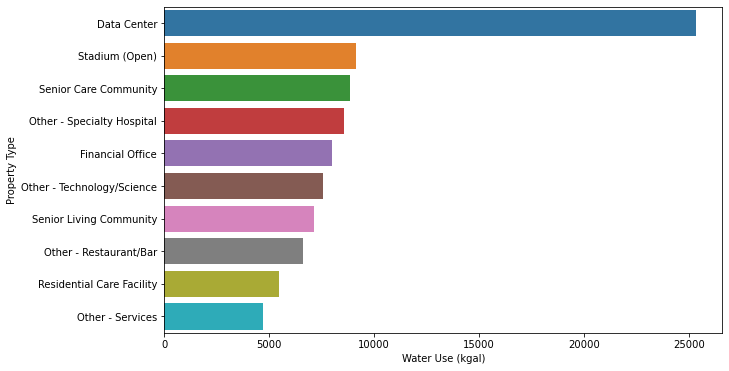

In [104]:
sns.barplot(data=water_usage_df, y=water_usage_df.index, x=water_usage_df.values.ravel())
plt.xlabel('Water Use (kgal)')
plt.ylabel('Property Type')
plt.show()

### It is noteworthy that data centers have high water consumption too due to constant need of cooling the machinery. 

In [105]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

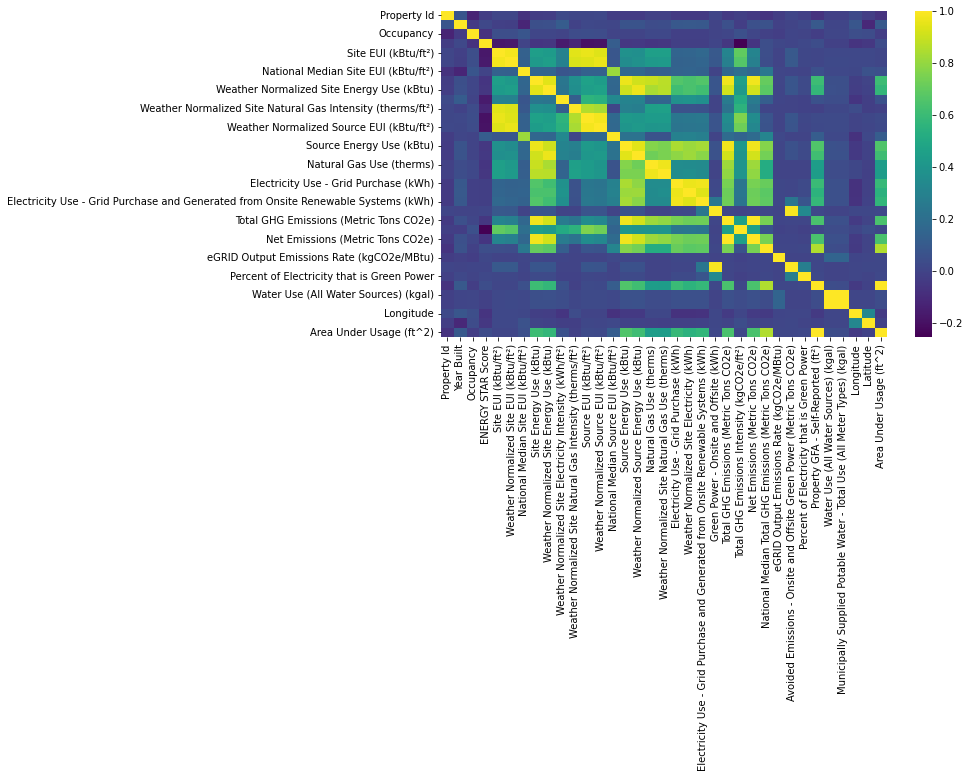

In [106]:
# plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

In [107]:
correlation_matrix = df.corr()

# Create a mask to exclude duplicate and self-correlations
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Stack the correlation matrix and reset the index
stacked_corr = correlation_matrix.stack()[mask.flatten()]

# Get the top 10 correlated pairs (absolute values)
top_correlations = stacked_corr.abs().nlargest(10)

# Display the top 10 correlated pairs
print(top_correlations)

Total GHG Emissions (Metric Tons CO2e)  Net Emissions (Metric Tons CO2e)                                                     0.999637
Water Use (All Water Sources) (kgal)    Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)              0.995930
Property GFA - Self-Reported (ft²)      Area Under Usage (ft^2)                                                              0.995159
Green Power - Onsite and Offsite (kWh)  Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)                0.986971
Site EUI (kBtu/ft²)                     Weather Normalized Site EUI (kBtu/ft²)                                               0.979919
Source EUI (kBtu/ft²)                   Weather Normalized Source EUI (kBtu/ft²)                                             0.978785
Source Energy Use (kBtu)                Total GHG Emissions (Metric Tons CO2e)                                               0.973509
                                        Net Emissions (Metric 

In [108]:
df['Primary Property Type - Portfolio Manager-Calculated']

0                         Office
1                         Office
2               Financial Office
3                         Office
4                         Office
                  ...           
26666    Senior Living Community
26667           Worship Facility
26668           Worship Facility
26669        Multifamily Housing
26670           Worship Facility
Name: Primary Property Type - Portfolio Manager-Calculated, Length: 26671, dtype: object

In [109]:
df['Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)']

0         6508639.0
1         4198818.0
2         6117998.0
3         4207162.0
4        23758870.0
            ...    
26666      221636.6
26667      146962.5
26668      146962.5
26669      180195.0
26670      146962.5
Name: Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh), Length: 26671, dtype: float64

In [110]:
df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Natural Gas Use (therms)'].median().nlargest()

Primary Property Type - Portfolio Manager-Calculated
Energy/Power Station                     6.464850e+06
Zoo                                      1.925238e+06
Hospital (General Medical & Surgical)    4.062210e+05
Stadium (Open)                           3.536040e+05
Wastewater Treatment Plant               2.115303e+05
Name: Natural Gas Use (therms), dtype: float64

In [111]:
df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)'].median().nlargest()

Primary Property Type - Portfolio Manager-Calculated
Wastewater Treatment Plant               37676210.0
Stadium (Open)                           16742750.0
Indoor Arena                             16549860.0
Data Center                              13863910.5
Hospital (General Medical & Surgical)    10138010.0
Name: Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh), dtype: float64

In [112]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

In [113]:
df.groupby('Borough')['Weather Normalized Site Energy Use (kBtu)'].median().nlargest()

Borough
MANHATTAN    5538973.25
BRONX        5110458.50
QUEENS       5110458.50
BROOKLYN     4427086.40
STATEN IS    4375818.60
Name: Weather Normalized Site Energy Use (kBtu), dtype: float64

In [114]:
df.groupby('Borough')['Weather Normalized Site Natural Gas Use (therms)'].median().nlargest()

Borough
QUEENS       34055.95
BROOKLYN     33589.10
BRONX        31178.75
STATEN IS    24514.80
MANHATTAN    21243.55
Name: Weather Normalized Site Natural Gas Use (therms), dtype: float64

#### Interestingly, Manhattan's gas usage is lowest among all boroughs

In [115]:
df.groupby('Borough')['Weather Normalized Site Electricity Intensity (kWh/ft²)'].median().nlargest()

Borough
MANHATTAN    6.3
STATEN IS    6.0
BRONX        4.7
QUEENS       4.7
BROOKLYN     4.5
Name: Weather Normalized Site Electricity Intensity (kWh/ft²), dtype: float64

In [116]:
df.groupby('Borough')['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].median().nlargest()

Borough
BRONX        0.6
BROOKLYN     0.6
QUEENS       0.6
STATEN IS    0.4
MANHATTAN    0.3
Name: Weather Normalized Site Natural Gas Intensity (therms/ft²), dtype: float64

In [117]:
df.groupby('Borough')['Total GHG Emissions Intensity (kgCO2e/ft²)'].median().nlargest()

Borough
BRONX        5.2
MANHATTAN    4.8
QUEENS       4.5
BROOKLYN     4.3
STATEN IS    4.3
Name: Total GHG Emissions Intensity (kgCO2e/ft²), dtype: float64

#### The borough of Bronx has higher intensity of greenhouse gas emissions

### Model Implementation

In [118]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
      

In [119]:
df['Site Energy Use (kBtu)'].dtypes

dtype('float64')

### 'Site Energy Use (kBtu)' is our target feature which is numeric

In [120]:
df.shape

(26671, 44)

In [121]:
df.dtypes.value_counts()


float64    32
object      9
int64       3
dtype: int64

In [122]:
df.select_dtypes(include=['float', 'int']).columns

Index(['Property Id', 'Year Built', 'Occupancy', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'T

### Lets first standardize our data because many features have different units of measurements

In [123]:
# features_of_interest=df.select_dtypes(include=['float', 'int']).columns.tolist()
# features_to_remove=['Property Id', 'Year Built', 'Longitude','Latitude']
# numerical_features=[feature for feature in features_of_interest if feature not in features_to_remove]

In [124]:
df.shape

(26671, 44)

In [125]:
numerical_features=df.select_dtypes(include=['float', 'int']).drop(columns=['Property Id', 'Longitude','Latitude'])

In [126]:
# from sklearn.preprocessing import StandardScaler

# scalar=StandardScaler()
# numerical_features_scaled=scalar.fit_transform(numerical_features)
# df_scaled=pd.DataFrame(data=numerical_features_scaled, columns=numerical_features.columns)

In [127]:
# df1=df.select_dtypes(exclude=['float', 'int'])

In [128]:
# df2=df.select_dtypes(include=['float', 'int']).drop(columns=numerical_features)
# df2

In [129]:
# df3=pd.concat([df1, df2], axis=1)

In [130]:
# df_final=pd.concat([df3, df_scaled], axis=1)
# df_final.shape

### df_final is our standardized dataframe

In [131]:
# df_final.dtypes.value_counts()

In [132]:
# location_identifier_features=df.select_dtypes(include=['float', 'int']).drop(columns=df_scaled.columns)
# location_identifier_features

In [133]:
# categorical_features=df.select_dtypes(include=['object'])
# categorical_features

### There are 31 numerical columns in our dataset. We need to find which features explains most variance. We will use Principal Components Analysis (PCA) on our numeric variables and use elbow method to find the optimal value of n_components

In [134]:
# from sklearn.decomposition import PCA

# pca=PCA(n_components=10)
# X_pca=pca.fit_transform(numerical_features_scaled)
# cumulative_var=pca.explained_variance_ratio_

In [135]:
# plt.plot(range(1, pca.n_components_ + 1), cumulative_var, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Proportion of Variance Explained')
# plt.title('Scree Plot')
# plt.show()

### From above, we can see that the curve flattens out at n_components=3. Hence we will use n_components=3 in PCA

In [136]:
# pca=PCA(n_components=3)
# X_numeric_pca=pca.fit_transform(numerical_features_scaled)

In [137]:
# columns = [f"PC{i+1}" for i in range(X_numeric_pca.shape[1])]
# df_numeric_pca = pd.DataFrame(data=X_numeric_pca, columns=columns)

### We will now handle categorical data

In [138]:
numerical_features

,Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),...,Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Area Under Usage (ft^2)
0,1982,55,83.0,41.70,44.00,71.4,28621509.3,30188450.1,9.5,0.1,...,3.2,2190.6,3754.9,79.5,0.0,0.0,686838.0,1131.80,1127.55,686838.0
1,1956,100,11.0,234.90,234.90,133.7,90318696.0,90318696.0,10.9,0.1,...,16.1,6184.2,3520.1,79.5,0.0,0.0,384432.0,5025.70,5025.70,384432.0
2,1989,95,74.0,56.00,58.80,80.0,32329714.8,33950130.3,10.6,0.0,...,4.2,2407.5,3439.3,79.5,0.0,0.0,577534.0,7994.80,7828.80,577534.0
3,1961,100,73.0,70.40,72.30,98.1,27516842.6,28246291.0,10.8,0.0,...,5.1,2003.9,2793.7,79.5,0.0,0.0,390878.0,1131.80,1127.55,390878.0
4,1999,100,53.0,78.70,81.60,82.3,126054250.5,130721778.4,14.8,0.2,...,5.6,8976.8,9392.1,79.5,0.0,0.0,1601977.0,1131.80,1127.55,1601977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26666,1920,100,83.0,117.30,125.00,155.4,3088625.0,3290262.3,8.4,1.0,...,7.0,184.0,243.7,79.5,0.0,0.0,26324.0,7125.90,7050.75,26324.0
26667,1997,100,49.0,41.45,47.25,30.5,1763775.9,1989843.9,3.9,0.3,...,0.0,0.0,61.4,79.5,0.0,0.0,32017.0,300.25,310.30,32017.0
26668,1997,100,49.0,41.45,47.25,30.5,1763775.9,1989843.9,3.9,0.3,...,0.0,0.0,80.0,79.5,0.0,0.0,41756.0,300.25,310.30,41756.0
26669,1910,100,59.0,88.90,107.10,94.4,2318409.0,2795339.4,7.7,0.8,...,5.3,139.3,148.1,79.5,0.0,0.0,26090.0,1788.60,1788.60,26090.0


In [139]:
df.shape

(26671, 44)

In [140]:
df['Year Built'].dtypes

dtype('int64')

In [141]:
numerical_features.shape

(26671, 32)

In [142]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
X=df.drop(columns=['Source Energy Use (kBtu)']).values
y=df['Source Energy Use (kBtu)']

In [144]:
X

array([[7365, '1155', '1155  Avenue  of  the  Americas', ..., -73.982826,
        40.756631, 686838.0],
       [8139, '200', '200  East  42nd  St.', ..., -73.974306, 40.750698,
        384432.0],
       [8604, '114', '114  West  47th  st', ..., -73.982504, 40.75831,
        577534.0],
       ...,
       [17298486, '110-31A Merrick Boulevard',
        '110-31A Merrick Boulevard', ..., -73.782002, 40.695127, 41756.0],
       [17321529, '402 EAST 78 STREET', '402 EAST 78 STREET', ...,
        -73.952824, 40.771496, 26090.0],
       [17333571, '110-31B Merrick Blvd', '110-31B Merrick Blvd', ...,
        -73.782002, 40.695127, 7452.0]], dtype=object)

In [145]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Construction Status', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'Borough', 'NTA'],
      dtype='object')

In [146]:
df['NTA'].nunique()

194

In [147]:
df['Primary Property Type - Portfolio Manager-Calculated'].nunique()

75

In [148]:
cat_features=df.select_dtypes('object').drop(columns=['Property Name', 'Address 1', 'Postcode'])
cat_features

,Primary Property Type - Portfolio Manager-Calculated,Construction Status,Metered Areas (Energy),Metered Areas (Water),Borough,NTA
0,Office,Existing,Whole Property,Whole Property,MANHATTAN,Midtown-Midtown South
1,Office,Existing,Whole Property,Whole Property,MANHATTAN,Turtle Bay-East Midtown
2,Financial Office,Existing,Whole Property,Whole Property,MANHATTAN,Midtown-Midtown South
3,Office,Existing,Whole Property,Whole Property,MANHATTAN,Turtle Bay-East Midtown
4,Office,Existing,Whole Property,Whole Property,MANHATTAN,Midtown-Midtown South
...,...,...,...,...,...,...
26666,Senior Living Community,Test,Whole Property,Whole Property,MANHATTAN,Central Harlem North-Polo Grounds
26667,Worship Facility,Existing,Whole Property,Whole Property,QUEENS,South Jamaica
26668,Worship Facility,Existing,Whole Property,Whole Property,QUEENS,South Jamaica
26669,Multifamily Housing,Existing,Whole Property,Whole Property,MANHATTAN,Lenox Hill-Roosevelt Island


In [149]:
final_df=pd.concat([cat_features, numerical_features], axis=1)
final_df.shape

(26671, 38)

### Machine Learning


In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
numerical_features = final_df.select_dtypes(include=['float', 'int']).columns
cat_features = final_df.select_dtypes(include=['object']).columns

In [152]:
enc=OneHotEncoder()
encoded_features=enc.fit_transform(final_df[cat_features])
encoded_features_df=pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(cat_features))

In [153]:
scalar=StandardScaler()
df[numerical_features]=scalar.fit_transform(df[numerical_features])

In [154]:
encoded_standardized_df=pd.concat([encoded_features_df, df[numerical_features]], axis=1)
encoded_standardized_df

,Primary Property Type - Portfolio Manager-Calculated_Adult Education,Primary Property Type - Portfolio Manager-Calculated_Ambulatory Surgical Center,Primary Property Type - Portfolio Manager-Calculated_Automobile Dealership,Primary Property Type - Portfolio Manager-Calculated_Bank Branch,Primary Property Type - Portfolio Manager-Calculated_Bar/Nightclub,Primary Property Type - Portfolio Manager-Calculated_Bowling Alley,Primary Property Type - Portfolio Manager-Calculated_College/University,Primary Property Type - Portfolio Manager-Calculated_Convention Center,Primary Property Type - Portfolio Manager-Calculated_Courthouse,Primary Property Type - Portfolio Manager-Calculated_Data Center,...,Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Area Under Usage (ft^2)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.306951,0.671110,1.753434,-0.031975,-0.008156,-0.046434,2.121079,-0.069269,-0.068847,2.092421
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.709779,2.397284,1.620173,-0.031975,-0.008156,-0.046434,0.991843,-0.005335,-0.004566,0.975843
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.150615,0.764862,1.574315,-0.031975,-0.008156,-0.046434,1.712919,0.043415,0.041657,1.688836
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.009913,0.590412,1.207906,-0.031975,-0.008156,-0.046434,1.015913,-0.069269,-0.068847,0.999643
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068255,3.604343,4.952820,-0.031975,-0.008156,-0.046434,5.538367,-0.069269,-0.068847,5.471403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.287125,-0.196212,-0.239344,-0.031975,-0.008156,-0.046434,-0.345395,0.029149,0.028827,-0.346405
26667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.807225,-0.275744,-0.342808,-0.031975,-0.008156,-0.046434,-0.324136,-0.082923,-0.082323,-0.325385
26668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.807225,-0.275744,-0.332251,-0.031975,-0.008156,-0.046434,-0.287769,-0.082923,-0.082323,-0.289425
26669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021354,-0.215533,-0.293601,-0.031975,-0.008156,-0.046434,-0.346268,-0.058485,-0.057946,-0.347269


In [155]:
X=encoded_standardized_df.drop(columns=['Site Energy Use (kBtu)']).values
y=encoded_standardized_df['Site Energy Use (kBtu)'].values

In [156]:
algorithms = {
    'Ridge Regression (L2)': Ridge(),
    'Lasso Regression (L1)': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'SVM Regressor': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Initialize results dictionary to store model performance metrics
results = {}

In [157]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [158]:
for name, model in algorithms.items():
    # Train the model on the preprocessed training set
    model.fit(X_train, y_train)

    # Predict on the preprocessed test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]  # Number of samples in the test set
    p = X_test.shape[1]  # Number of features in the test set
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted R2': adj_r2
    }

    print(f"{name} - Mean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

Ridge Regression (L2) - Mean Squared Error: 0.01, RMSE: 0.10, R2: 0.9895, Adjusted R2: 0.9888
Lasso Regression (L1) - Mean Squared Error: 1.05, RMSE: 1.02, R2: -0.0000, Adjusted R2: -0.0641
Decision Tree Regression - Mean Squared Error: 0.04, RMSE: 0.19, R2: 0.9648, Adjusted R2: 0.9626
SVM Regressor - Mean Squared Error: 0.72, RMSE: 0.85, R2: 0.3113, Adjusted R2: 0.2672
KNN - Mean Squared Error: 0.09, RMSE: 0.31, R2: 0.9107, Adjusted R2: 0.9049
Random Forest - Mean Squared Error: 0.04, RMSE: 0.19, R2: 0.9654, Adjusted R2: 0.9632


In [159]:
# Hyperparameter Tuning using GridSearchCV
param_grids = {
    'Ridge Regression (L2)': {'alpha': [0.1, 1, 10]},
    'Lasso Regression (L1)': {'alpha': [0.1, 1, 10]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM Regressor': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [50, 70, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

In [160]:
# Initialize GridSearchCV for each algorithm
grid_searches = {}
for name, model in algorithms.items():
    if name in param_grids:
        param_grid = param_grids[name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        grid_searches[name] = grid_search

In [161]:
cv_results = {}

for name, model in algorithms.items():
    # Cross-validation using neg_mean_squared_error (negative because GridSearchCV maximizes scores)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate metrics
    mse_cv = -cv_score.mean()
    rmse_cv = np.sqrt(mse_cv)
    r2_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    n_cv = X_train.shape[0]  # Number of samples in the training set
    p_cv = X_train.shape[1]  # Number of features in the training set
    adj_r2_cv = 1 - (1 - r2_cv) * ((n_cv - 1) / (n_cv - p_cv - 1))
    
    # Store results
    cv_results[name] = {
        'MSE': mse_cv,
        'RMSE': rmse_cv,
        'R2': r2_cv,
        'Adjusted R2': adj_r2_cv
    }
    
    print(f"{name} - Cross-Validation Mean Squared Error: {mse_cv:.2f}, RMSE: {rmse_cv:.2f}, R2: {r2_cv:.4f}, Adjusted R2: {adj_r2_cv:.4f}")

Ridge Regression (L2) - Cross-Validation Mean Squared Error: 0.00, RMSE: 0.03, R2: 0.9990, Adjusted R2: 0.9989
Lasso Regression (L1) - Cross-Validation Mean Squared Error: 0.96, RMSE: 0.98, R2: 0.0815, Adjusted R2: 0.0675
Decision Tree Regression - Cross-Validation Mean Squared Error: 0.09, RMSE: 0.30, R2: 0.9459, Adjusted R2: 0.9451
SVM Regressor - Cross-Validation Mean Squared Error: 0.67, RMSE: 0.82, R2: 0.4106, Adjusted R2: 0.4016
KNN - Cross-Validation Mean Squared Error: 0.10, RMSE: 0.32, R2: 0.9072, Adjusted R2: 0.9058
Random Forest - Cross-Validation Mean Squared Error: 0.06, RMSE: 0.24, R2: 0.9647, Adjusted R2: 0.9642


In [162]:
# best_model_name = min(cv_results, key=lambda k: cv_results[k]['MSE'])
# best_model = grid_searches[best_model_name].best_estimator_

grid_searches

{'Ridge Regression (L2)': GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
              param_grid={'alpha': [0.1, 1, 10]},
              scoring='neg_mean_squared_error'),
 'Lasso Regression (L1)': GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
              param_grid={'alpha': [0.1, 1, 10]},
              scoring='neg_mean_squared_error'),
 'Decision Tree Regression': GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
              param_grid={'max_depth': [None, 10, 20],
                          'min_samples_split': [2, 5, 10]},
              scoring='neg_mean_squared_error'),
 'SVM Regressor': GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
              param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
              scoring='neg_mean_squared_error'),
 'KNN': GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
              param_grid={'n_neighbors': [3, 5, 7]},
              scoring='neg_mean_squared_error'),
 'Random Forest': GridSearchCV(c

In [164]:
# best_models = {}

# for name, grid_search in grid_searches.items():
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
    
#     # Store the best model, hyperparameters, and score
#     best_models[name] = {
#         'Model': best_model,
#         'Best Parameters': best_params,
#         'Best Score': best_score
#     }
    
#     print(f"Best {name} Model:")
#     print(f"  Hyperparameters: {best_params}")
#     print(f"  Cross-Validation Score: {best_score:.4f}")

In [166]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:")
print(f"  Model: {best_model}")
print(f"  Hyperparameters: {best_params}")
print(f"  Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Model:
  Model: RandomForestRegressor(max_depth=10)
  Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
  Cross-Validation Score: -0.0530


In [167]:
model=RandomForestRegressor(max_depth=10, n_estimators=100, min_samples_split=2)

In [169]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [170]:
y_pred=model.predict(X_test)

In [174]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features in the test set
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2:.4f}")

Mean Squared Error: 0.0318
R-squared: 0.9696
Adjusted R-squared: 0.9696
